In [3]:
import pandas as pd
import numpy as np

# Simulate data generation (sensor readings)
np.random.seed(10)  # Set seed for reproducibility
sensor_data = np.random.randint(10, 100, 10)  # Generate random sensor readings
df = pd.DataFrame({'sensor_value': sensor_data})
df['timestamp'] = pd.Timestamp.now()  # Add timestamp

# Simulate data storage (in-memory storage for simplicity)
in_memory_storage = df.copy()

# Simulate data ingestion
ingested_data = in_memory_storage.copy()

# Simulate data transformation (cleaning missing values)
ingested_data.loc[2, 'sensor_value'] = np.NAN  # Introduce missing value
ingested_data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Simulate data serving (data analysis)
print(ingested_data.describe())



       sensor_value                      timestamp
count     10.000000                             10
mean      40.600000  2024-05-22 18:26:37.444411904
min       10.000000     2024-05-22 18:26:37.444412
25%       20.500000  2024-05-22 18:26:37.444411904
50%       31.500000  2024-05-22 18:26:37.444411904
75%       47.250000  2024-05-22 18:26:37.444411904
max       99.000000     2024-05-22 18:26:37.444412
std       29.262035                            NaN


   order_id  order_date product_id product_category  quantity  unit_price  \
0      1001  2023-05-01       P001      Electronics         2       99.99   
1      1002  2023-05-02       P002         Clothing         1       29.95   
2      1003  2023-05-03       P003            Books         3       14.99   
3      1004  2023-05-04       P004      Electronics         1      249.99   
4      1005  2023-05-05       P005         Clothing         2       39.95   

  customer_id  
0        C001  
1        C002  
2        C001  
3        C003  
4        C002  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10 non-null     int64  
 1   order_date        10 non-null     object 
 2   product_id        10 non-null     object 
 3   product_category  10 non-null     object 
 4   quantity          10 non-null     int64  
 5   unit_p

<ipython-input-4-396d26dc50bd>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category', y='total_revenue', data=grouped, palette='viridis')


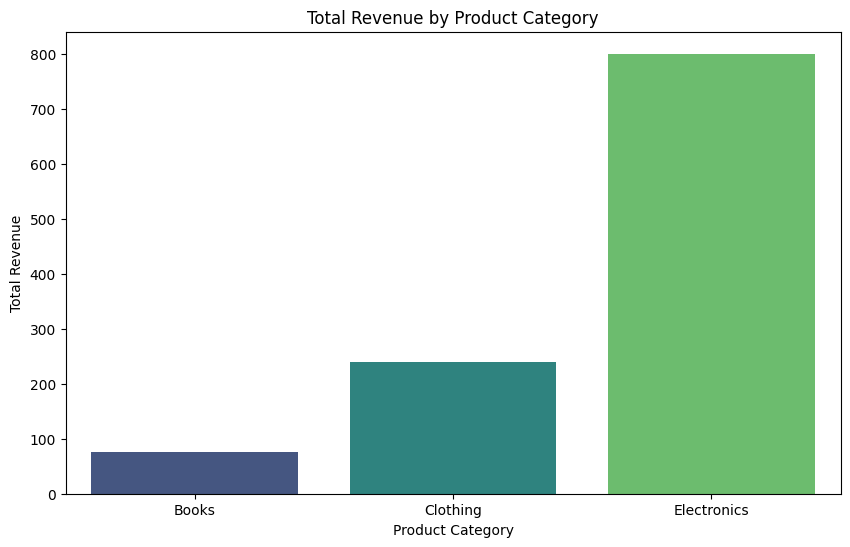

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generation
sales_data = [
    ['1001', '2023-05-01', 'P001', 'Electronics', 2, 99.99, 'C001'],
    ['1002', '2023-05-02', 'P002', 'Clothing', 1, 29.95, 'C002'],
    ['1003', '2023-05-03', 'P003', 'Books', 3, 14.99, 'C001'],
    ['1004', '2023-05-04', 'P004', 'Electronics', 1, 249.99, 'C003'],
    ['1005', '2023-05-05', 'P005', 'Clothing', 2, 39.95, 'C002'],
    ['1006', '2023-05-06', 'P001', 'Electronics', 1, 99.99, 'C004'],
    ['1007', '2023-05-07', 'P002', 'Clothing', 3, 29.95, 'C001'],
    ['1008', '2023-05-08', 'P003', 'Books', 2, 14.99, 'C003'],
    ['1009', '2023-05-09', 'P004', 'Electronics', 1, 249.99, 'C002'],
    ['1010', '2023-05-10', 'P005', 'Clothing', 1, 39.95, 'C004']
]

with open('sales_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['order_id', 'order_date', 'product_id', 'product_category', 'quantity', 'unit_price', 'customer_id'])
    writer.writerows(sales_data)

# Step 2: Storage
# Data is stored in the 'sales_data.csv' file

# Step 3: Ingestion
df = pd.read_csv('sales_data.csv')
print(df.head())
print(df.info())

# Step 4: Transformation
# Data cleaning
df = df.dropna()
df = df.drop_duplicates()

# Formatting
df['order_date'] = pd.to_datetime(df['order_date'])

# Feature engineering
df['total_revenue'] = df['quantity'] * df['unit_price']

# Data manipulation
grouped = df.groupby('product_category')[['total_revenue', 'quantity']].agg({'total_revenue': 'sum', 'quantity': 'mean'}).reset_index()
print(grouped)

# Step 5: Serving Data
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='total_revenue', data=grouped, palette='viridis')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.show()



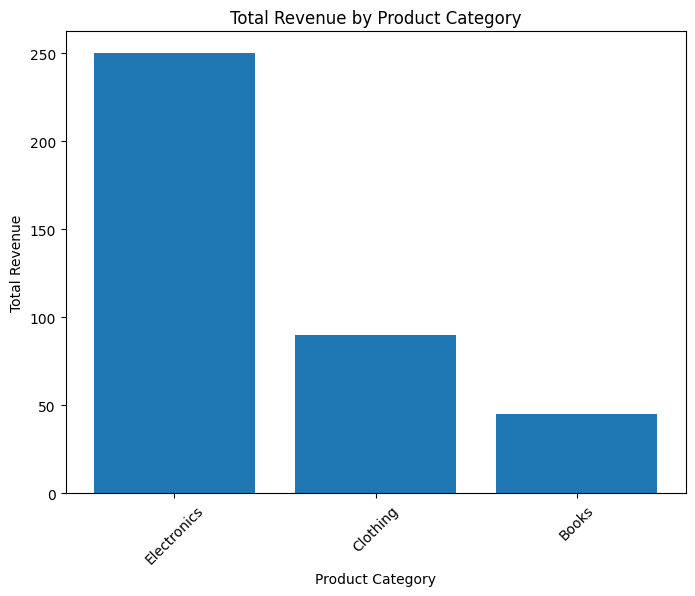

Average Quantity per Order: 1.70


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generation
sales_data = np.array([
    ['1001', '2023-05-01', 'P001', 'Electronics', 2, 99.99, 'C001'],
    ['1002', '2023-05-02', 'P002', 'Clothing', 1, 29.95, 'C002'],
    ['1003', '2023-05-03', 'P003', 'Books', 3, 14.99, 'C001'],
    ['1004', '2023-05-04', 'P004', 'Electronics', 1, 249.99, 'C003'],
    ['1005', '2023-05-05', 'P005', 'Clothing', 2, 39.95, 'C002'],
    ['1006', '2023-05-06', 'P001', 'Electronics', 1, 99.99, 'C004'],
    ['1007', '2023-05-07', 'P002', 'Clothing', 3, 29.95, 'C001'],
    ['1008', '2023-05-08', 'P003', 'Books', 2, 14.99, 'C003'],
    ['1009', '2023-05-09', 'P004', 'Electronics', 1, 249.99, 'C002'],
    ['1010', '2023-05-10', 'P005', 'Clothing', 1, 39.95, 'C004']
])

# Step 2: Storage
np.save('sales_data.npy', sales_data)

# Step 3: Ingestion
data = np.load('sales_data.npy')

# Step 4: Transformation
total_revenue = data[:, 4].astype(int) * data[:, 5].astype(float)
avg_quantity = np.mean(data[:, 4].astype(int))

# Step 5: Serving Data
plt.figure(figsize=(8, 6))
plt.bar(data[:, 3], total_revenue)
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

print(f"Average Quantity per Order: {avg_quantity:.2f}")

<ipython-input-6-a23a31841ccc>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_category', y='total_revenue', data=df, palette='cool')


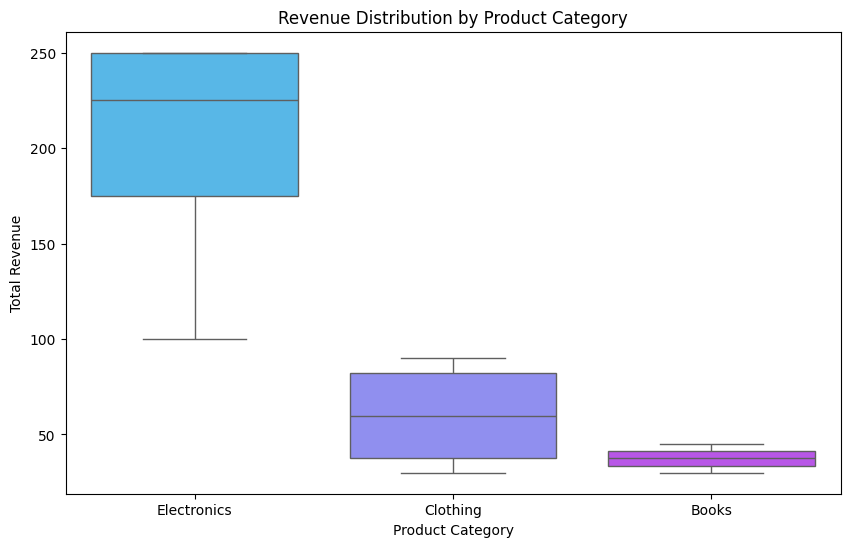

<ipython-input-6-a23a31841ccc>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total_revenue', data=grouped, palette='cool')


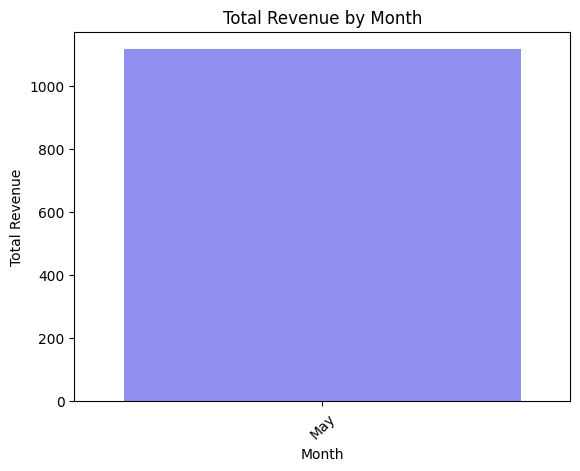

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generation
sales_data = [
    ['1001', '2023-05-01', 'P001', 'Electronics', 2, 99.99, 'C001'],
    ['1002', '2023-05-02', 'P002', 'Clothing', 1, 29.95, 'C002'],
    ['1003', '2023-05-03', 'P003', 'Books', 3, 14.99, 'C001'],
    ['1004', '2023-05-04', 'P004', 'Electronics', 1, 249.99, 'C003'],
    ['1005', '2023-05-05', 'P005', 'Clothing', 2, 39.95, 'C002'],
    ['1006', '2023-05-06', 'P001', 'Electronics', 1, 99.99, 'C004'],
    ['1007', '2023-05-07', 'P002', 'Clothing', 3, 29.95, 'C001'],
    ['1008', '2023-05-08', 'P003', 'Books', 2, 14.99, 'C003'],
    ['1009', '2023-05-09', 'P004', 'Electronics', 1, 249.99, 'C002'],
    ['1010', '2023-05-10', 'P005', 'Clothing', 1, 39.95, 'C004']
]

# Step 2: Storage
df = pd.DataFrame(sales_data, columns=['order_id', 'order_date', 'product_id', 'product_category', 'quantity', 'unit_price', 'customer_id'])
df.to_csv('sales_data.csv', index=False)

# Step 3: Ingestion
df = pd.read_csv('sales_data.csv')

# Step 4: Transformation
df['order_date'] = pd.to_datetime(df['order_date'])
df['total_revenue'] = df['quantity'] * df['unit_price']
df['month'] = df['order_date'].dt.strftime('%B')

# Step 5: Serving Data
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_category', y='total_revenue', data=df, palette='cool')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Revenue Distribution by Product Category')
plt.show()

grouped = df.groupby('month')['total_revenue'].sum().reset_index()
sns.barplot(x='month', y='total_revenue', data=grouped, palette='cool')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.xticks(rotation=45)
plt.show()

In [7]:
import pandas as pd
import plotly.express as px

# Step 1: Generation
sales_data = [
    ['1001', '2023-05-01', 'P001', 'Electronics', 2, 99.99, 'C001'],
    ['1002', '2023-05-02', 'P002', 'Clothing', 1, 29.95, 'C002'],
    ['1003', '2023-05-03', 'P003', 'Books', 3, 14.99, 'C001'],
    ['1004', '2023-05-04', 'P004', 'Electronics', 1, 249.99, 'C003'],
    ['1005', '2023-05-05', 'P005', 'Clothing', 2, 39.95, 'C002'],
    ['1006', '2023-05-06', 'P001', 'Electronics', 1, 99.99, 'C004'],
    ['1007', '2023-05-07', 'P002', 'Clothing', 3, 29.95, 'C001'],
    ['1008', '2023-05-08', 'P003', 'Books', 2, 14.99, 'C003'],
    ['1009', '2023-05-09', 'P004', 'Electronics', 1, 249.99, 'C002'],
    ['1010', '2023-05-10', 'P005', 'Clothing', 1, 39.95, 'C004']
]

# Step 2: Storage
df = pd.DataFrame(sales_data, columns=['order_id', 'order_date', 'product_id', 'product_category', 'quantity', 'unit_price', 'customer_id'])
df.to_csv('sales_data.csv', index=False)

# Step 3: Ingestion
df = pd.read_csv('sales_data.csv')

# Step 4: Transformation
df['order_date'] = pd.to_datetime(df['order_date'])
df['total_revenue'] = df['quantity'] * df['unit_price']

# Step 5: Serving Data
fig = px.scatter(df, x='order_date', y='total_revenue', color='product_category', size='quantity',
                 hover_data={'order_id': True, 'customer_id': True, 'unit_price': ':.2f'},
                 labels={'order_date': 'Order Date', 'total_revenue': 'Total Revenue', 'product_category': 'Product Category'},
                 title='Sales Analysis')
fig.update_layout(xaxis_title='Order Date', yaxis_title='Total Revenue')
fig.show()